<a href="https://colab.research.google.com/github/huiesoo/esaa/blob/main/23-2/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 및 라이브러리 로딩

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 라이브러리 설치
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/submission.csv')

In [ ]:
#데이터 로드
# 승원
train=pd.read_csv('/content/drive/MyDrive/ESAA/영화 관객수/movies_train.csv')
test=pd.read_csv('/content/drive/MyDrive/ESAA/영화 관객수/movies_test.csv')
submission=pd.read_csv('/content/drive/MyDrive/ESAA/영화 관객수/submission.csv')

In [ ]:
# 데이터 로드
# 수미
train=pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/영화 관객 수/movies_train.csv')
test=pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/영화 관객 수/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/영화 관객 수/submission.csv')

In [ ]:
# 시현
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영화/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영화/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영화/submission.csv')

# 2. 데이터탐색

In [ ]:
train.shape

(600, 12)



*   title : 영화의 제목
*   distributor : 배급사
*   genre : 장르
*   release_time : 개봉일
*   time : 상영시간(분)
*   screening_rat : 상영등급
*   director : 감독이름
*   dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
*   dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
*   num_staff : 스텝수
*   num_actor : 주연배우수
*   box_off_num : 관객수



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


# 3. 데이터 시각화

<ipython-input-80-3e2884c62efa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = train.corr(), annot=True)


<Axes: >

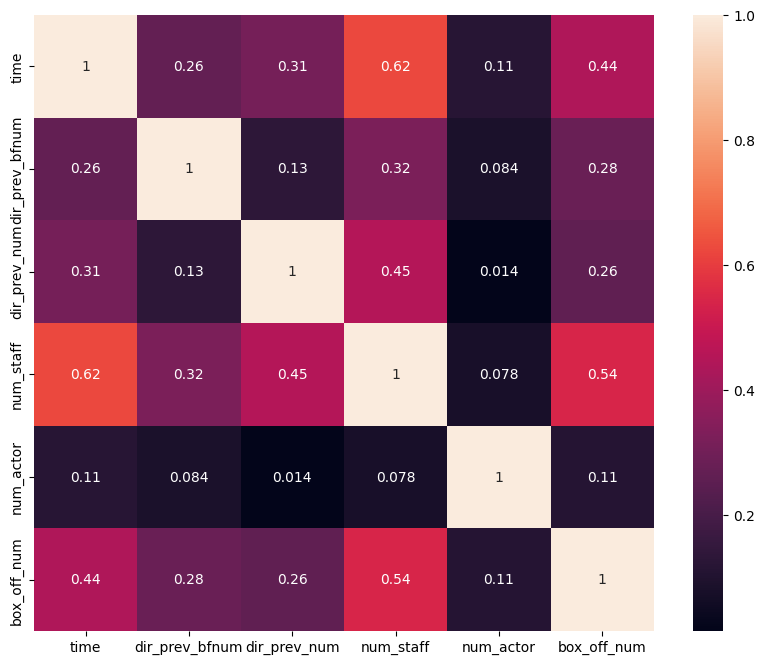

In [ ]:
# train의 변수 간 상관관계
plt.figure(figsize=(10,8))
sns.heatmap(data = train.corr(), annot=True)

영화 관객수를 에측할 것이므로

box_off_num과 다른 피처들 간의 상관관계 확인

sum_staff, time, dir_prev_bfnum, dir_prev_num, num_actor 순.

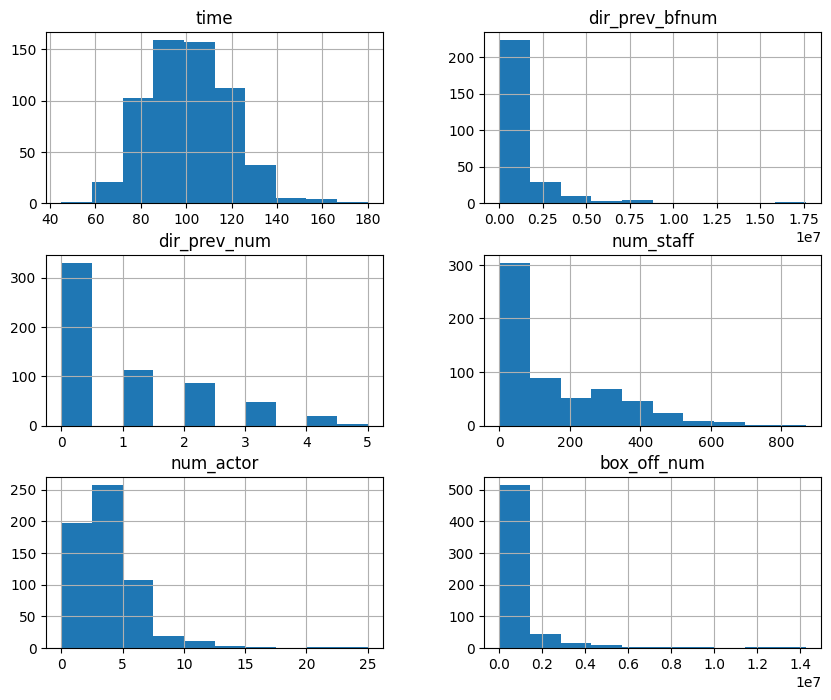

In [ ]:
# train의 피처 분포
train.hist(figsize=(10, 8))
plt.show()

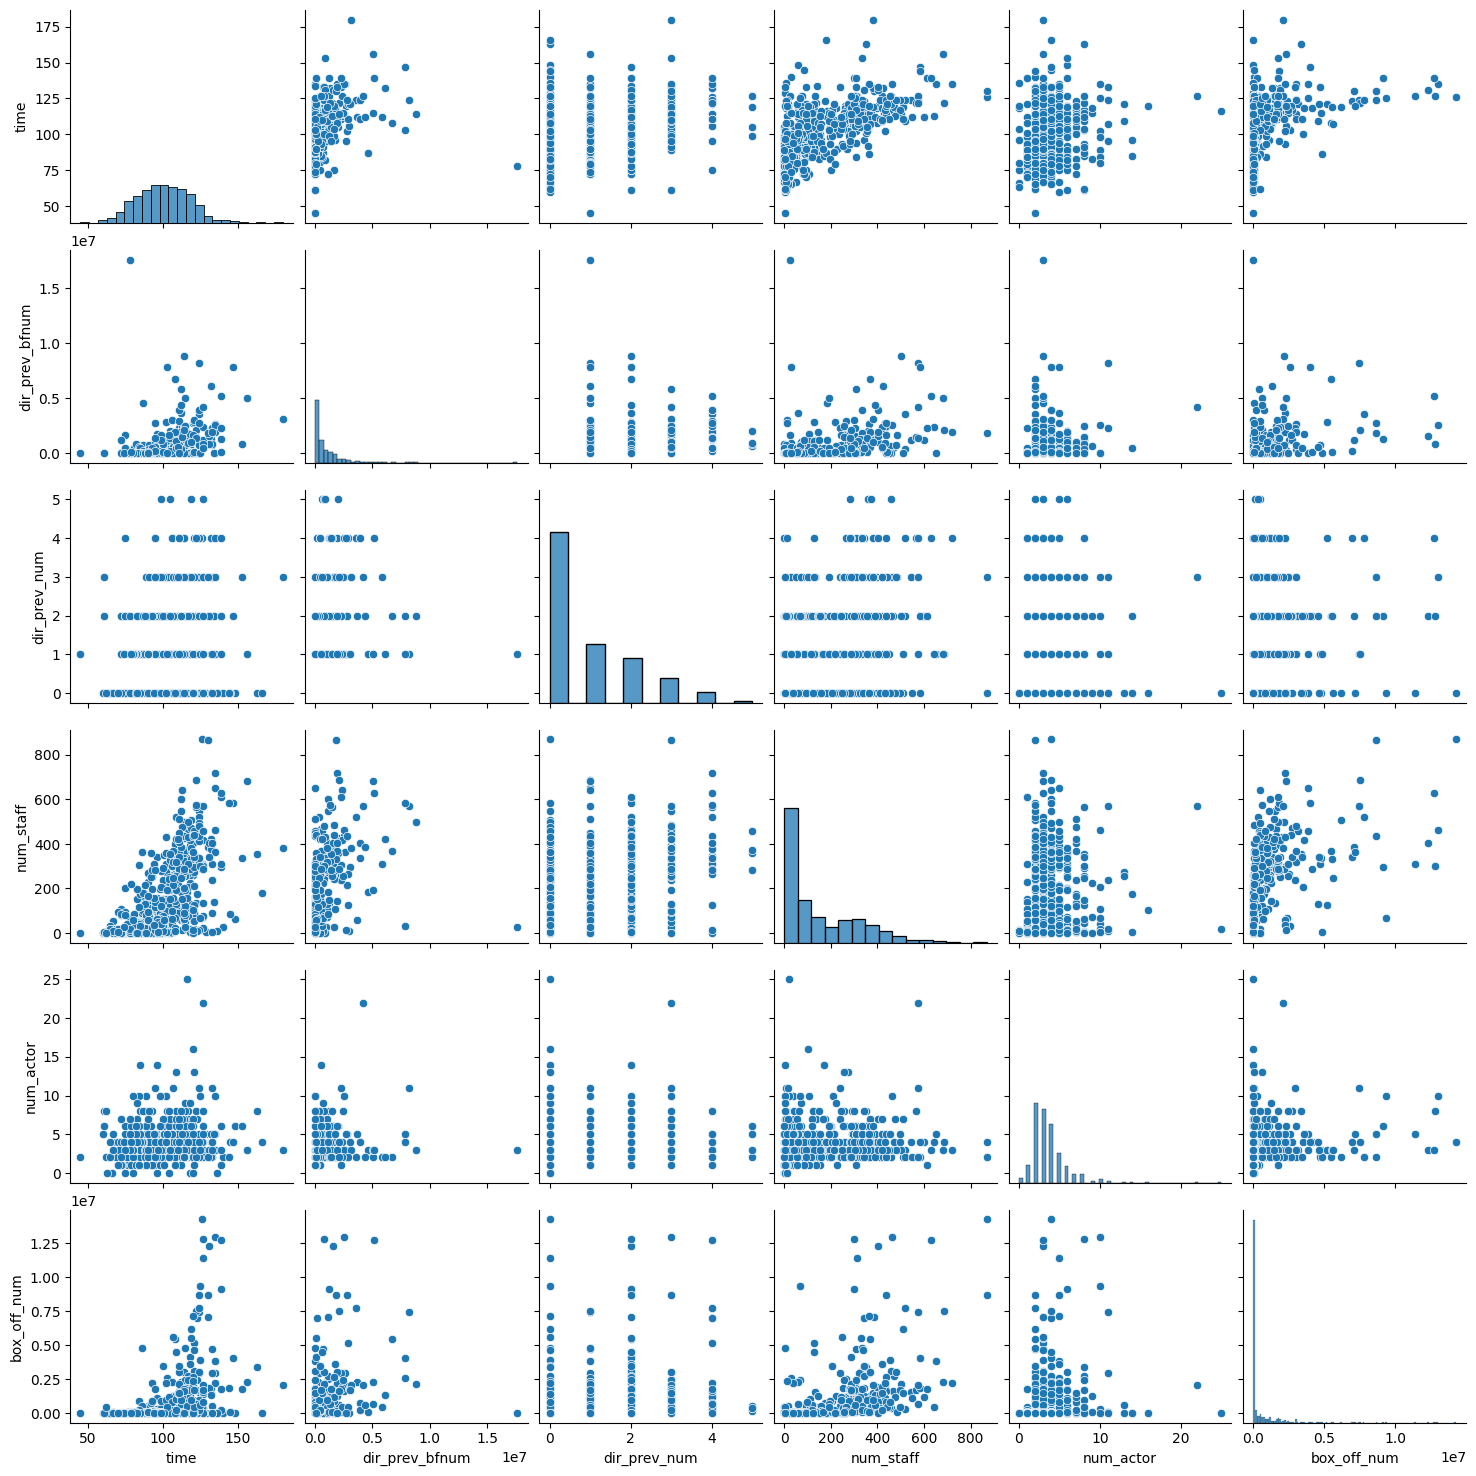

In [ ]:
# train의 피처 간 관계
sns.pairplot(train)
plt.show()

# 4. 전처리

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# 시현
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영화/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영화/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영화/submission.csv')

# 범주형 변수 distributor, genre, screening_rat 에 대한 원핫 인코딩
dataset = pd.concat(objs = [train, test], axis = 0)
dataset = pd.get_dummies(dataset, columns=['distributor','genre','screening_rat'], prefix=['distributor','genre','screening_rat'])
train = pd.DataFrame(dataset.iloc[:600,:])
test = pd.DataFrame(dataset.iloc[600:,:])
test= test.drop("box_off_num", axis=1) # concat하면 train test 변수개수 달라서 test에 target값이 추가됨. 따라서 삭제

# 필요없는 변수 drop
train= train.drop(["title","director"],axis=1)
test= test.drop(["title","director"],axis=1)

# 날짜 데이터 처리 (release_time을 yaer, month, day로 나누기)
train['release_time'] = pd.to_datetime(train['release_time'])
train['release_year'] = train['release_time'].dt.year
train['release_month'] = train['release_time'].dt.month
train =  train.drop(['release_time'],axis = 1)

test['release_time'] = pd.to_datetime(test['release_time'])
test['release_year'] = test['release_time'].dt.year
test['release_month'] = test['release_time'].dt.month
test =  test.drop(['release_time'],axis = 1)

# dir_prev_bfnum 결측값을 중앙값으로 대체 : 제거,0,평균,중앙값 중에 가장 좋은 성능을 나타냄.
train['dir_prev_bfnum'].fillna(train['dir_prev_bfnum'].median(), inplace=True)
test['dir_prev_bfnum'].fillna(test['dir_prev_bfnum'].median(), inplace=True)

# y 로그스케일링
# train["box_off_num"]=np.log1p(train["box_off_num"])

list = ["num_staff", "num_actor"]

for i in list:
  train[i] = np.log1p(train[i])
  test[i] = np.log1p(test[i])

# X,y 나누기 및 train_test_split
from sklearn.model_selection import train_test_split
X= train.drop("box_off_num",axis=1)
y= train["box_off_num"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size = 0.2)

In [ ]:
# 필요없는 변수 drop
train= train.drop(["title","director"],axis=1)
test= test.drop(["title","director"],axis=1)

In [ ]:
# 날짜 데이터 처리
train['release_time'] = pd.to_datetime(train['release_time'])
train['release_year'] = train['release_time'].dt.year
train['release_month'] = train['release_time'].dt.month
train =  train.drop(['release_time'],axis = 1)

test['release_time'] = pd.to_datetime(test['release_time'])
test['release_year'] = test['release_time'].dt.year
test['release_month'] = test['release_time'].dt.month
test =  test.drop(['release_time'],axis = 1)

In [ ]:
# 영화 개수가 10개 이하인 배급사를 '기타'로 처리
distributor_counts = train['distributor'].value_counts()
distributor_list = distributor_counts[distributor_counts > 10]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [ ]:
# 결측치 확인
train.isnull().sum()

distributor         0
genre               0
time                0
screening_rat       0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
release_year        0
release_month       0
dtype: int64

In [ ]:
# dir_prev_bfnum 결측값을 중앙값으로 대체 : 제거,0,평균,중앙값 중에 가장 좋은 성능을 나타냄.
train['dir_prev_bfnum'].fillna(train['dir_prev_bfnum'].median(), inplace=True)
test['dir_prev_bfnum'].fillna(test['dir_prev_bfnum'].median(), inplace=True)

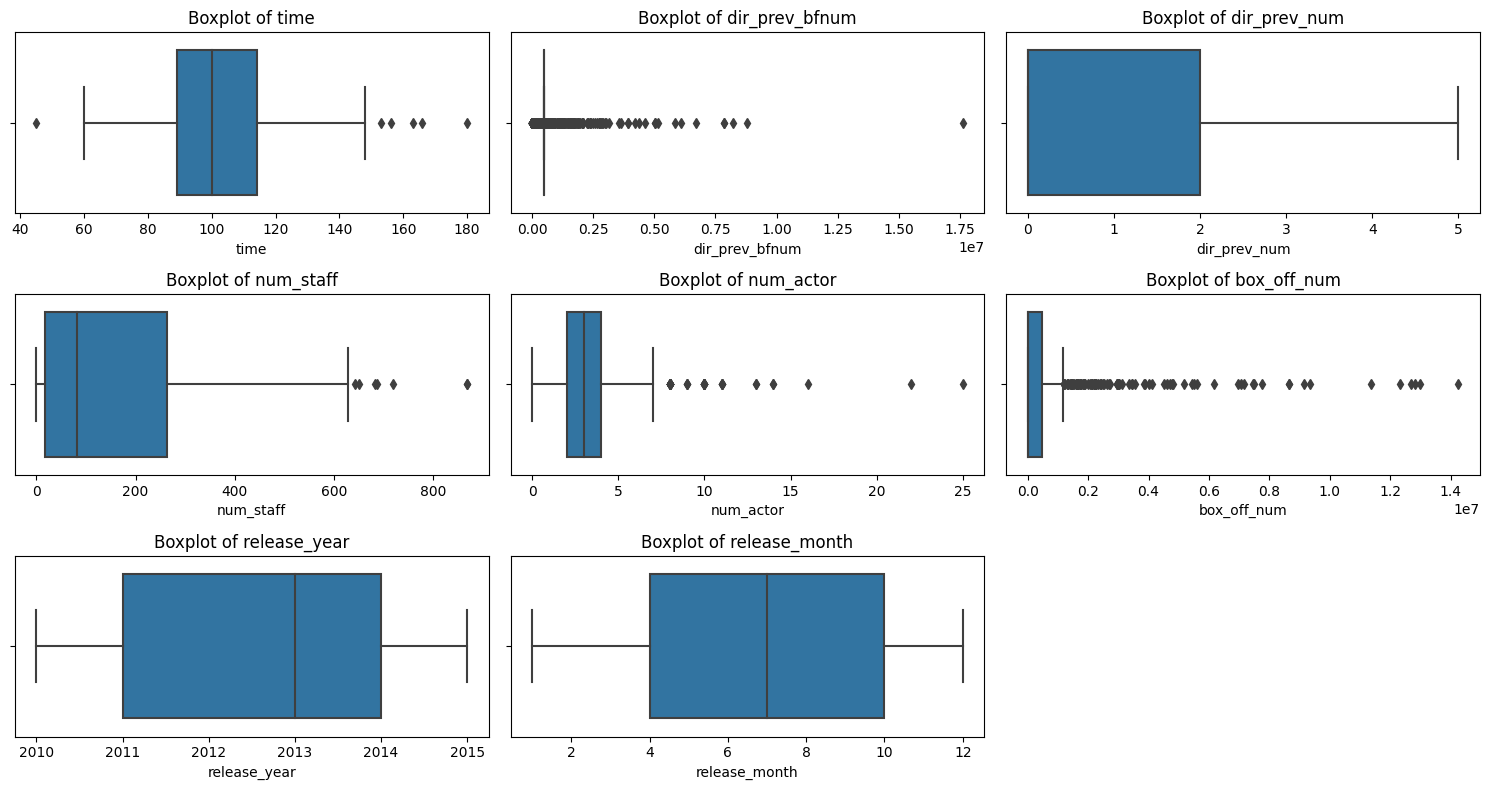

In [ ]:
# 이상치 확인
numeric_features = train.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_features.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# dir_prev_bfnum에서 극단적으로 큰 값만 삭제
train = train.sort_values(by='dir_prev_bfnum', ascending=False).iloc[1:]

In [ ]:
train.sort_values(by='dir_prev_bfnum', ascending=False)

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month
214,(주)NEW,SF,114,15세 관람가,8801639.0,2,500,3,2130645,2010,11
16,기타,코미디,124,15세 관람가,8223342.0,1,572,11,7453715,2011,5
118,기타,코미디,103,12세 관람가,7855474.0,1,31,5,2541603,2010,12
409,롯데엔터테인먼트,드라마,147,청소년 관람불가,7838528.5,2,583,4,4015364,2014,9
326,CJ 엔터테인먼트,미스터리,108,15세 관람가,6720926.5,2,369,2,5443049,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
552,롯데엔터테인먼트,코미디,107,15세 관람가,19.0,2,215,3,210278,2012,11
186,롯데엔터테인먼트,멜로/로맨스,88,청소년 관람불가,17.0,1,214,4,94875,2010,10
465,기타,멜로/로맨스,114,15세 관람가,8.0,1,200,2,283449,2012,1
202,인디스토리,드라마,102,15세 관람가,7.0,1,112,5,4941,2013,11


In [ ]:
# 범주형 변수 distributor, genre, screening_rat 에 대한 원핫 인코딩
dataset = pd.concat(objs = [train, test], axis = 0)
dataset = pd.get_dummies(dataset, columns=['distributor','genre','screening_rat'], prefix=['distributor','genre','screening_rat'])
train = pd.DataFrame(dataset.iloc[:599,:])
test = pd.DataFrame(dataset.iloc[599:,:])
test= test.drop("box_off_num", axis=1) # concat하면 train test 변수개수 달라서 test에 target값이 추가됨. 따라서 삭제

In [ ]:
#y 로그스케일링
#train["box_off_num"]=np.log1p(train["box_off_num"])

In [ ]:
# X,y 나누기 및 train_test_split
from sklearn.model_selection import train_test_split
X= train.drop("box_off_num",axis=1)
y= train["box_off_num"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size = 0.2)

In [ ]:
X

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,release_year,release_month,distributor_(주) 케이알씨지,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
214,114,8801639.0,2,500,3,2010,11,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16,124,8223342.0,1,572,11,2011,5,0,0,0,...,0,0,0,0,0,1,0,1,0,0
118,103,7855474.0,1,31,5,2010,12,0,0,0,...,0,0,0,0,0,1,1,0,0,0
409,147,7838528.5,2,583,4,2014,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
326,108,6720926.5,2,369,2,2015,11,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,107,19.0,2,215,3,2012,11,0,0,0,...,0,0,0,0,0,1,0,1,0,0
186,88,17.0,1,214,4,2010,10,0,0,0,...,0,0,0,0,0,0,0,0,0,1
465,114,8.0,1,200,2,2012,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
202,102,7.0,1,112,5,2013,11,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 5. 정규화

In [ ]:
# col1 : 원핫인코딩 하지 않은 변수 리스트
# col2 : 원핫인코딩 한 변수 리스트
col1 = [ 'time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'release_year', 'release_month' ]
col2 = list(set(X.columns) - set(col1))

In [ ]:
# X 데이터프레임에서 col1에 해당하는 열들을 추출
X_col1 = X[col1]
test_col1 = test[col1]

# X 데이터프레임에서 col2에 해당하는 열들을 추출
X_col2 = X[col2]
test_col2 = test[col2]

from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성 및 학습 데이터에 적용
scaler_col1 = StandardScaler()
X_col1_scaled = scaler_col1.fit_transform(X_col1)

# 학습 데이터에서 학습된 평균과 표준편차를 기반으로 테스트 데이터에 적용
test_col1_scaled = scaler_col1.transform(test_col1)

# 표준화된 값들을 다시 데이터프레임으로 변환
X_col1_scaled_df = pd.DataFrame(X_col1_scaled, columns=col1)
test_col1_scaled_df = pd.DataFrame(test_col1_scaled, columns=col1)

# 기존 X 데이터프레임에서 col1에 해당하는 열들을 표준화된 값으로 대체
X_standardized_df = X_col1_scaled_df
test_standardized_df = test_col1_scaled_df

# 합치기
X_stand = pd.concat([X_standardized_df,X_col2.reset_index(drop=True)],axis=1)
test_stand = pd.concat([test_standardized_df,test_col2.reset_index(drop=True)],axis=1)

# 6. 모델링

## 1) 선형 회귀
- 일반,릿지,라쏘,엘라스틱

### (1) 일반 선형 회귀 : 2108468.9453678965
일반 선형 회귀 : 예측값과 실제값의 RSS를 최소화할 수 있도록 회귀계수를 최적화, 규제를 적용하지 않은 모델

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
pred = lr.predict(test)
submission['box_off_num'] =  np.abs(pred)
submission

,title,box_off_num
0,용서는 없다,1.240679e+06
1,아빠가 여자를 좋아해,2.221141e+06
2,하모니,2.946063e+06
3,의형제,3.375032e+06
4,평행 이론,1.881492e+06
...,...,...
238,해에게서 소년에게,3.449823e+05
239,울보 권투부,8.267906e+04
240,어떤살인,1.195029e+06
241,말하지 못한 비밀,4.967045e+04


In [ ]:
submission.to_csv('/content/drive/MyDrive/ESAA/23-2/자료/영화 관객 수/submission_lr5.csv',index=False)

### (2) 릿지 : 2236417.9218632714
릿지 : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0.05,0.1,1,5,8,9,10,12,15,20]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X, y, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.4f} '.format(alpha,avg_rmse))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.59703e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.2596e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.05113e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.05355e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


alpha 0.05 일 때 5 folds의 평균 RMSE : 1394860.7480 
alpha 0.1 일 때 5 folds의 평균 RMSE : 1394660.9118 
alpha 1 일 때 5 folds의 평균 RMSE : 1391798.8485 
alpha 5 일 때 5 folds의 평균 RMSE : 1385597.1574 
alpha 8 일 때 5 folds의 평균 RMSE : 1383741.0549 
alpha 9 일 때 5 folds의 평균 RMSE : 1383370.2367 
alpha 10 일 때 5 folds의 평균 RMSE : 1383083.5526 
alpha 12 일 때 5 folds의 평균 RMSE : 1382703.2901 
alpha 15 일 때 5 folds의 평균 RMSE : 1382466.4940 
alpha 20 일 때 5 folds의 평균 RMSE : 1382579.3114 


In [ ]:
ridge = Ridge(alpha=15)
ridge.fit(X, y)

pred = ridge.predict(test)
submission['box_off_num'] =  np.abs(pred)
submission

,title,box_off_num
0,용서는 없다,1.293821e+06
1,아빠가 여자를 좋아해,1.837923e+06
2,하모니,2.938589e+06
3,의형제,2.918255e+06
4,평행 이론,1.867007e+06
...,...,...
238,해에게서 소년에게,3.781646e+05
239,울보 권투부,2.213157e+05
240,어떤살인,1.175266e+06
241,말하지 못한 비밀,2.180518e+04


In [ ]:
submission.to_csv('/content/drive/MyDrive/ESAA/23-2/자료/영화 관객 수/submission_ridge1.csv',index=False)

### (3) 라쏘 : 2108363.2184005217
라쏘 : 선형 회귀에 L1 규제를 적용한 방식

In [ ]:
# (a) 표준화 x
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

alphas = [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(lasso, X, y, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f} '.format(alpha, avg_rmse))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.918e+13, tolerance: 8.308e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+14, tolerance: 1.829e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.832e+13, tolerance: 1.768e

alpha 0.001 일 때 5 folds의 평균 RMSE: 1395067.497 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.918e+13, tolerance: 8.308e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+14, tolerance: 1.829e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.832e+13, tolerance: 1.768e

alpha 0.005 일 때 5 folds의 평균 RMSE: 1395067.490 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+14, tolerance: 1.829e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.832e+13, tolerance: 1.768e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.099e+13, tolerance: 1.734e

alpha 0.008 일 때 5 folds의 평균 RMSE: 1395067.485 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+14, tolerance: 1.829e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.832e+13, tolerance: 1.768e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.099e+13, tolerance: 1.734e

alpha 0.05 일 때 5 folds의 평균 RMSE: 1395067.415 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.918e+13, tolerance: 8.308e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+14, tolerance: 1.829e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.832e+13, tolerance: 1.768e

alpha 0.03 일 때 5 folds의 평균 RMSE: 1395067.448 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.832e+13, tolerance: 1.768e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.099e+13, tolerance: 1.734e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+14, tolerance: 1.785e

alpha 0.1 일 때 5 folds의 평균 RMSE: 1395067.331 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+14, tolerance: 1.829e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.832e+13, tolerance: 1.768e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.099e+13, tolerance: 1.734e

alpha 0.5 일 때 5 folds의 평균 RMSE: 1395066.663 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.919e+13, tolerance: 8.308e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+14, tolerance: 1.829e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.832e+13, tolerance: 1.768e

alpha 1 일 때 5 folds의 평균 RMSE: 1395065.793 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.833e+13, tolerance: 1.768e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.713e+13, tolerance: 1.734e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+14, tolerance: 1.785e

alpha 5 일 때 5 folds의 평균 RMSE: 1395058.832 
alpha 10 일 때 5 folds의 평균 RMSE: 1395051.474 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+13, tolerance: 1.734e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+14, tolerance: 1.785e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(X, y)

pred = lasso.predict(test)
submission['box_off_num'] = np.abs(pred)
submission

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.322e+13, tolerance: 2.001e+11
  model = cd_fast.enet_coordinate_descent(


,title,box_off_num
0,용서는 없다,1.240586e+06
1,아빠가 여자를 좋아해,2.221139e+06
2,하모니,2.946100e+06
3,의형제,3.374718e+06
4,평행 이론,1.881563e+06
...,...,...
238,해에게서 소년에게,3.449578e+05
239,울보 권투부,8.286750e+04
240,어떤살인,1.194826e+06
241,말하지 못한 비밀,4.962117e+04


In [ ]:
submission.to_csv('/content/drive/MyDrive/ESAA/23-2/자료/영화 관객 수/submission_lasso1.csv',index=False)

### (4) 엘라스틱넷 : 2264124.674492335
엘라스틱넷 : L2, L1 규제를 함께 결합한 모델

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

alphas = [ 0.07, 0.1, 0.5, 1, 3]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]  # l1_ratio는 라쏘 페널티의 비율을 나타냄

for alpha in alphas:
    for l1_ratio in l1_ratios:
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
        neg_mse_scores = cross_val_score(elastic_net, X, y, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}, l1_ratio {1} 일 때 5 folds의 평균 RMSE: {2:.3f}'.format(alpha, l1_ratio, avg_rmse))

alpha 0.07, l1_ratio 0.1 일 때 5 folds의 평균 RMSE: 1383612.712
alpha 0.07, l1_ratio 0.3 일 때 5 folds의 평균 RMSE: 1382858.618
alpha 0.07, l1_ratio 0.5 일 때 5 folds의 평균 RMSE: 1382451.514
alpha 0.07, l1_ratio 0.7 일 때 5 folds의 평균 RMSE: 1383067.868
alpha 0.07, l1_ratio 0.9 일 때 5 folds의 평균 RMSE: 1387377.758
alpha 0.1, l1_ratio 0.1 일 때 5 folds의 평균 RMSE: 1385313.540
alpha 0.1, l1_ratio 0.3 일 때 5 folds의 평균 RMSE: 1384040.782
alpha 0.1, l1_ratio 0.5 일 때 5 folds의 평균 RMSE: 1382905.089
alpha 0.1, l1_ratio 0.7 일 때 5 folds의 평균 RMSE: 1382490.272
alpha 0.1, l1_ratio 0.9 일 때 5 folds의 평균 RMSE: 1385784.356
alpha 0.5, l1_ratio 0.1 일 때 5 folds의 평균 RMSE: 1398934.648
alpha 0.5, l1_ratio 0.3 일 때 5 folds의 평균 RMSE: 1396526.436
alpha 0.5, l1_ratio 0.5 일 때 5 folds의 평균 RMSE: 1393320.466
alpha 0.5, l1_ratio 0.7 일 때 5 folds의 평균 RMSE: 1388852.800
alpha 0.5, l1_ratio 0.9 일 때 5 folds의 평균 RMSE: 1382905.480
alpha 1, l1_ratio 0.1 일 때 5 folds의 평균 RMSE: 1404961.546
alpha 1, l1_ratio 0.3 일 때 5 folds의 평균 RMSE: 1402938.040
alpha 1, l1_r

In [ ]:
ElasticNet = ElasticNet(alpha=0.07, l1_ratio=0.5)
ElasticNet.fit(X, y)
pred = ElasticNet.predict(test)
submission['box_off_num'] = np.abs(pred)
submission

,title,box_off_num
0,용서는 없다,1.296241e+06
1,아빠가 여자를 좋아해,1.758313e+06
2,하모니,2.930615e+06
3,의형제,2.816704e+06
4,평행 이론,1.857638e+06
...,...,...
238,해에게서 소년에게,3.816962e+05
239,울보 권투부,2.351494e+05
240,어떤살인,1.164883e+06
241,말하지 못한 비밀,7.718009e+03


In [ ]:
submission.to_csv('/content/drive/MyDrive/ESAA/23-2/자료/영화 관객 수/submission_ElasticNet1.csv',index=False)

## 2) 머신러닝

### (1) 트리 : 1388790.0006379215

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42,max_depth=4,min_samples_leaf=9)
model.fit(X, y)
pred = model.predict(test)
submission['box_off_num'] = pred
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/영화/dt_model_scaled.csv',index=False)

### (2) XGBoost : 1141627.8381765804

In [ ]:
xgb_model = XGBRegressor(random_state=0)
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=5)
gridcv.fit(X, y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
xgb_model = XGBRegressor(random_state=0, colsample_bytree= 0.9, learning_rate= 0.09, max_depth= 3, n_estimators= 50)
xgb_model.fit(X, y)
pred = xgb_model.predict(test)
submission['box_off_num'] =  pred
submission.to_csv('/content/drive/MyDrive/ESAA/23-2/xgb_model.csv',index=False)

In [ ]:
#from xgboost import XGBRegressor
#xgb_model = XGBRegressor(gamma=0.8,max_depth=10, min_child_weight=1.2, n_estimators=10000, subsample=0.8)
#xgb_model.fit(X_train, y_train)
#pred = xgb_model.predict(X_test)
#print(r2_score(y_test,pred))


# 가장 좋은 결과
xgb_model = XGBRegressor(gamma=0.95, max_depth=10, min_child_weight=1.3, n_estimators=15000, subsample=0.7)
xgb_model.fit(X, y)
pred = xgb_model.predict(test)
submission['box_off_num'] = pred
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/영화/xgb_model.csv',index=False)
submission

,title,box_off_num
0,용서는 없다,1.213646e+06
1,아빠가 여자를 좋아해,-2.029179e+04
2,하모니,1.362880e+06
3,의형제,3.091564e+06
4,평행 이론,9.834776e+05
...,...,...
238,해에게서 소년에게,-1.386203e+05
239,울보 권투부,-1.897813e+04
240,어떤살인,-1.269575e+05
241,말하지 못한 비밀,-1.392303e+04


### (3) LGBM : 1271214.61348

In [ ]:
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV

lgbm_clf = lgbm.LGBMRegressor()

params = {
    'learning_rate': [0.01, 0.08, 0.12],
    'max_depth': [3, 4, 5],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [20, 50, 100],
    'min_child_weight':[60, 100],
    'subsample': [0.8, 0.9, 1.0]
}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=5)
gridcv.fit(X, y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
lgbm_model = lgbm.LGBMRegressor(learning_rate= 0.08, max_depth= 3, min_child_samples= 20, min_child_weight= 60, num_leaves= 31, subsample= 0.8)
lgbm_model.fit(X, y)
pred = lgbm_model.predict(test)
#submission['box_off_num'] = np.expm1(pred)
submission['box_off_num'] = pred
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/영화/lgbm_model_scaled.csv',index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 26
[LightGBM] [Info] Start training from score 709364.011686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

### (4) RandomForest : 1328989.2803019409

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor(random_state=42)

params = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드를 분할하는 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드의 최소 샘플 수
}

gridcv = GridSearchCV(rf_model, param_grid=params, cv=5)
gridcv.fit(X, y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
rf_model = RandomForestRegressor(random_state=0,max_depth = 10, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 200)
rf_model.fit(X, y)
pred = rf_model.predict(test)
submission['box_off_num'] = pred
submission.to_csv('/content/drive/MyDrive/ESAA/23-2/자료/영화 관객 수/submission_rf1.csv',index=False)

### (5) GradientBoosting : 1315002.2582910308

In [ ]:
# 최적화
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
GB_model = GradientBoostingRegressor(random_state=42)
params = {
    'n_estimators': [80,82,84],
    'learning_rate': [0.04,0.05,0.06,],
    'max_depth': [2,3]
}
gridcv = GridSearchCV(GB_model, param_grid=params, cv=5)
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
#GridSearchCV 최적 파라미터: {'learning_rate': 0.08, 'max_depth': 5, 'n_estimators': 88}
#GridSearchCV 최적 파라미터: {'learning_rate': 0.06, 'max_depth': 3, 'n_estimators': 84}


GridSearchCV 최적 파라미터: {'learning_rate': 0.04, 'max_depth': 2, 'n_estimators': 80}


In [ ]:
GB_model = GradientBoostingRegressor(random_state=42, learning_rate=0.04, max_depth = 2, n_estimators= 80)
GB_model.fit(X, y)
pred = GB_model.predict(test)
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영화/submission.csv')
submission['box_off_num'] = pred
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/영화/GB_model3.csv',index=False)